In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from statannotations.Annotator import Annotator #https://github.com/trevismd/statannotations

from itertools import combinations, cycle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data
from _cd_diagram import *

# Getting some free samples
results_df.sample(1)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/SimplifierBottomUp.py', '../models/SimplifierBottomUpOnlyLast.py', '../models/SimplifierBottomUpMAB.py', '../models/SmartVariationSimplifyMAB.py', '../models/SimplifierBottomUpCMAB.py', '../models/SmartVariationMAB.py', '../models/SimplifierTopDown.py', '../models/Vanilla.py', '../models/SmartVariationSimplify.py', '../models/SimplifierTopDownOnlyLast.py', '../models/SmartVariation.py'] ['Bottom Up', 'Bottom Up (only last)', 'Bottom Up MAB', 'LSH Variator with simplify and MAB', 'Bottom Up cMAB', 'LSH Variator with MAB', 'Top Down', 'Without simplify', 'LSH Variator with simplify', 'Top Down (only last)', 'LSH Variator']
(180, 14)
['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']
['Airfoil' 'Concrete' 'Energy Cooling' 'Energy Heating' 'Housing' 'Yacht']
[15, 25, 35, 45, 55, 65, 75, 85, 95, 100]


In [2]:
results_df.groupby(['dataset']).model.value_counts()

dataset         model                             
Airfoil         Bottom Up                             5
                LSH Variator                          5
                LSH Variator with MAB                 5
                LSH Variator with simplify            5
                LSH Variator with simplify and MAB    5
                Without simplify                      5
Concrete        Bottom Up                             5
                LSH Variator                          5
                LSH Variator with MAB                 5
                LSH Variator with simplify            5
                LSH Variator with simplify and MAB    5
                Without simplify                      5
Energy Cooling  Bottom Up                             5
                LSH Variator                          5
                LSH Variator with MAB                 5
                LSH Variator with simplify            5
                LSH Variator with simplify and MAB   

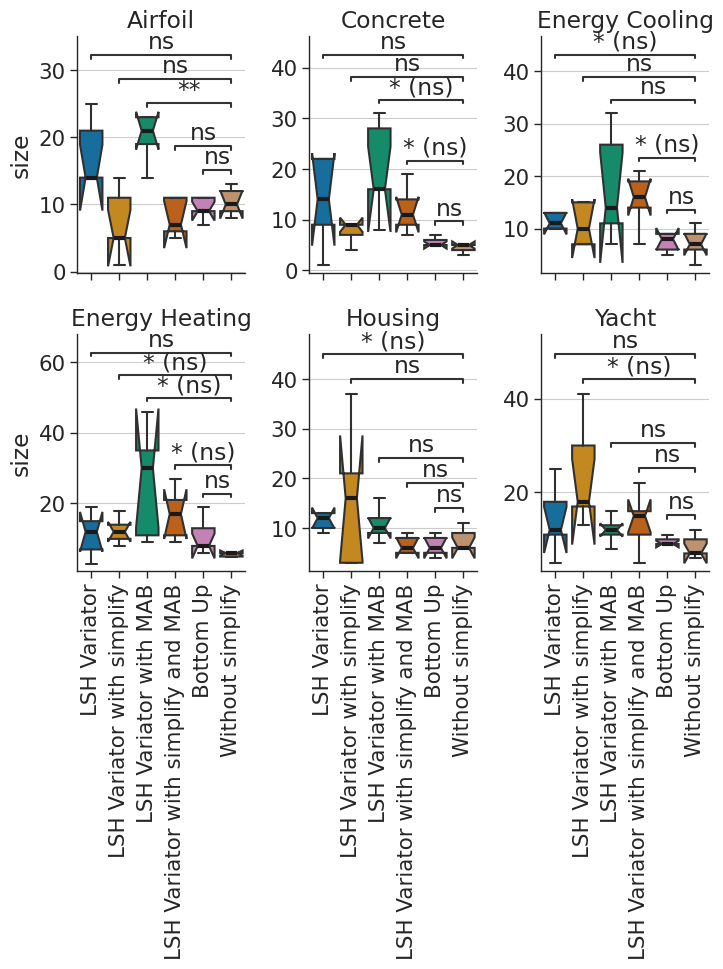

['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']


final critical differences diagram


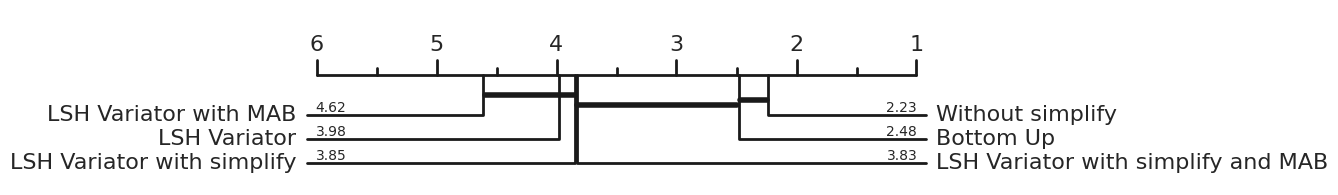

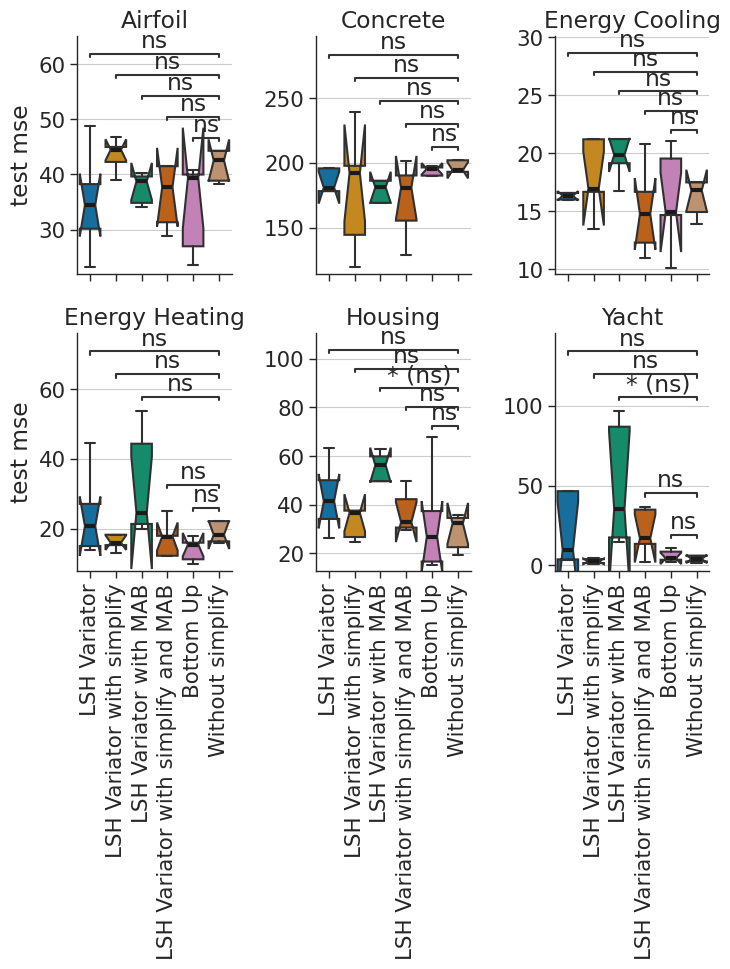

['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']


final critical differences diagram


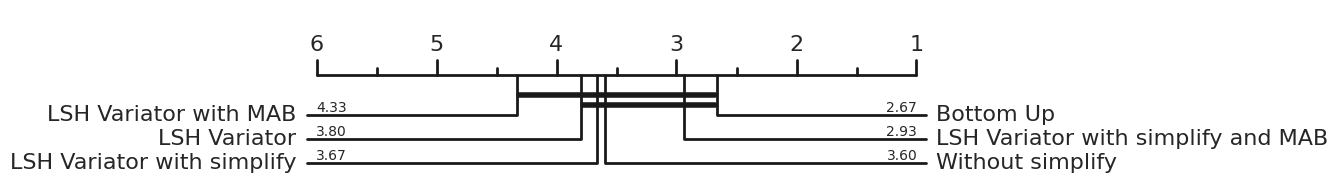

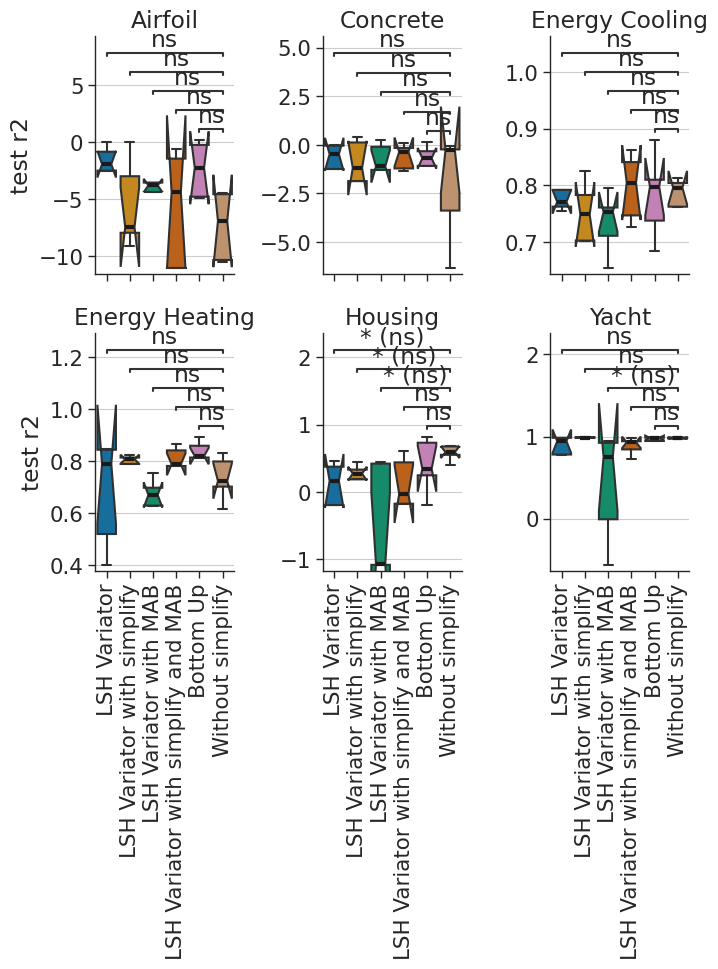

['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']


final critical differences diagram


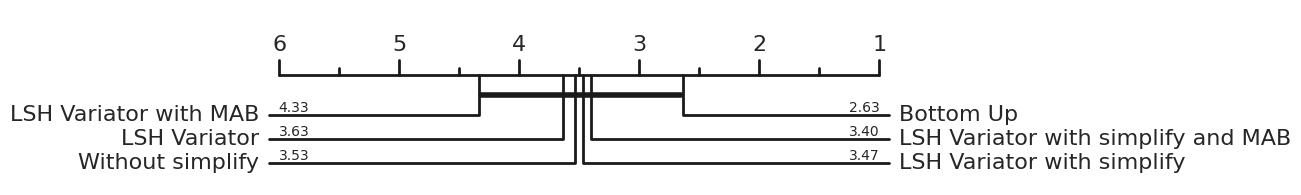

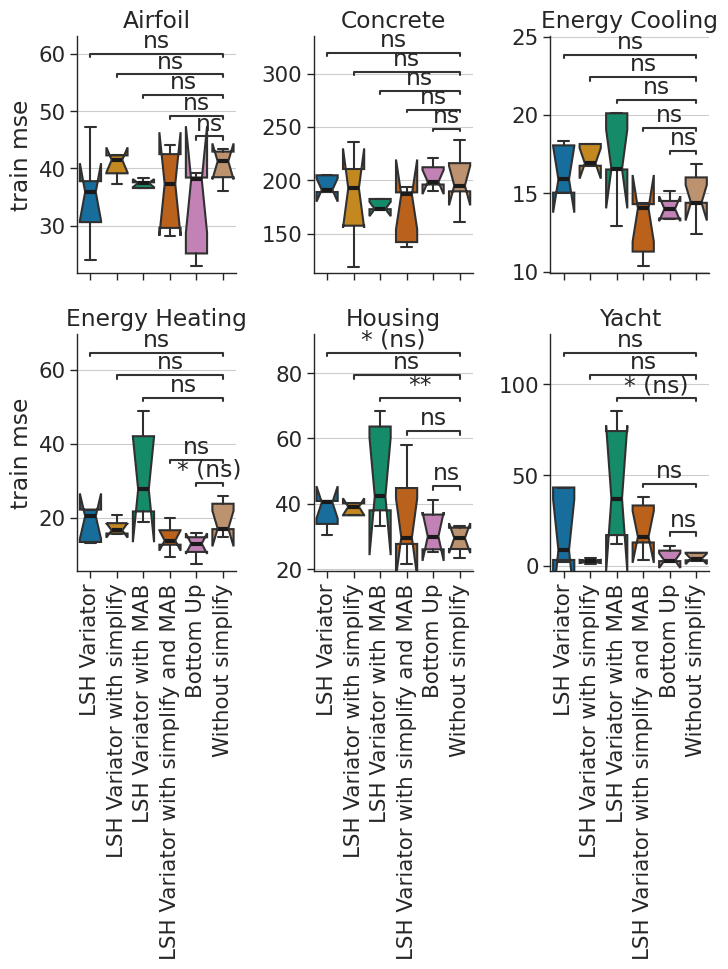

['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']


final critical differences diagram


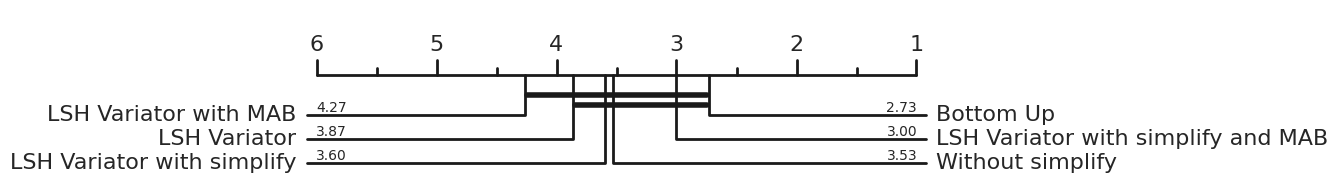

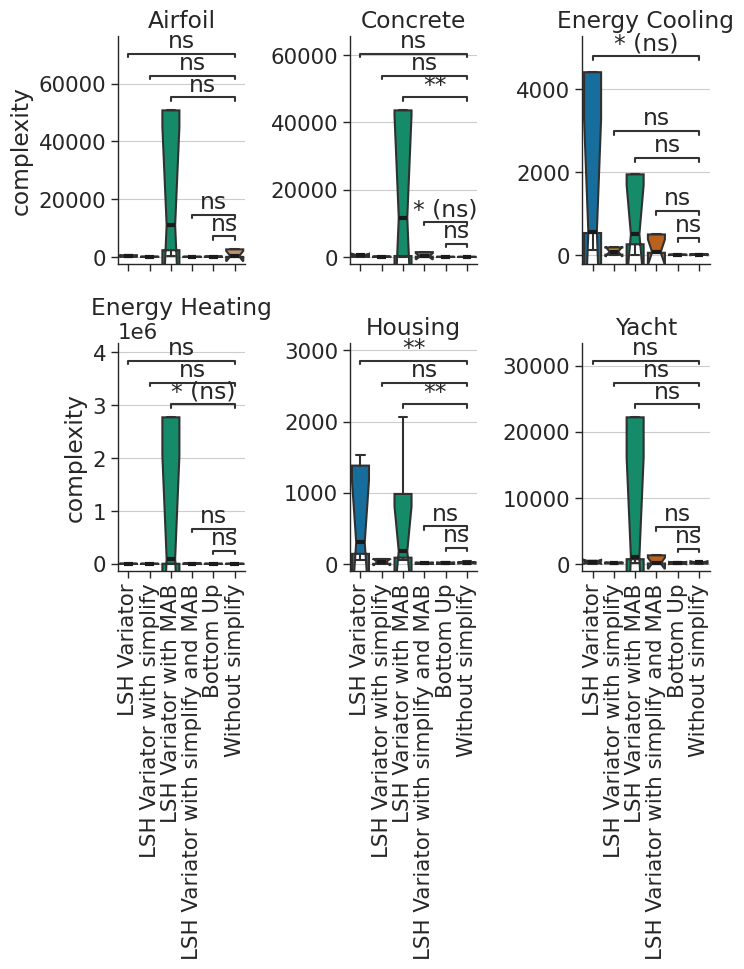

['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']


final critical differences diagram


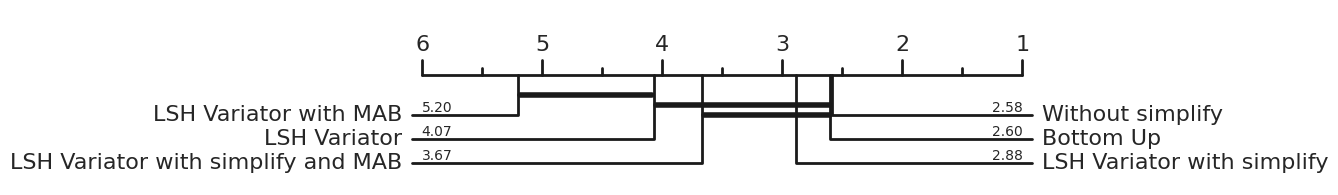

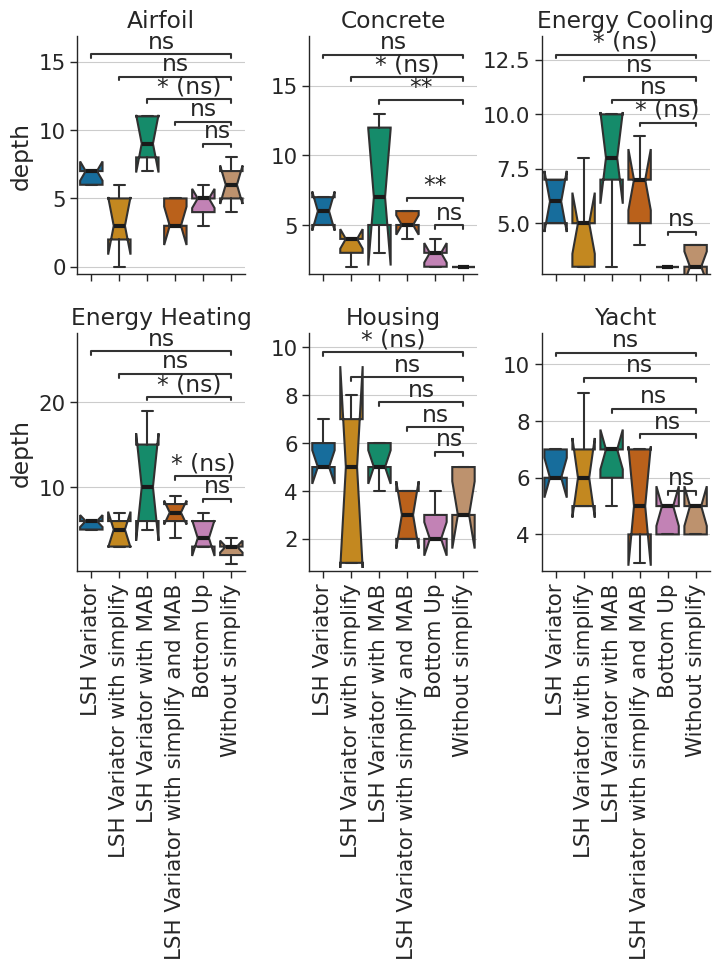

['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']


final critical differences diagram


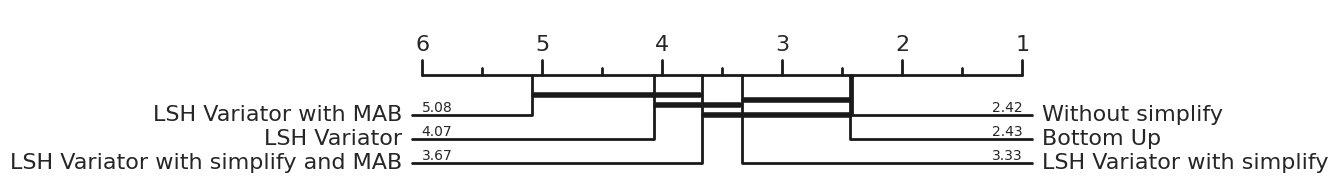

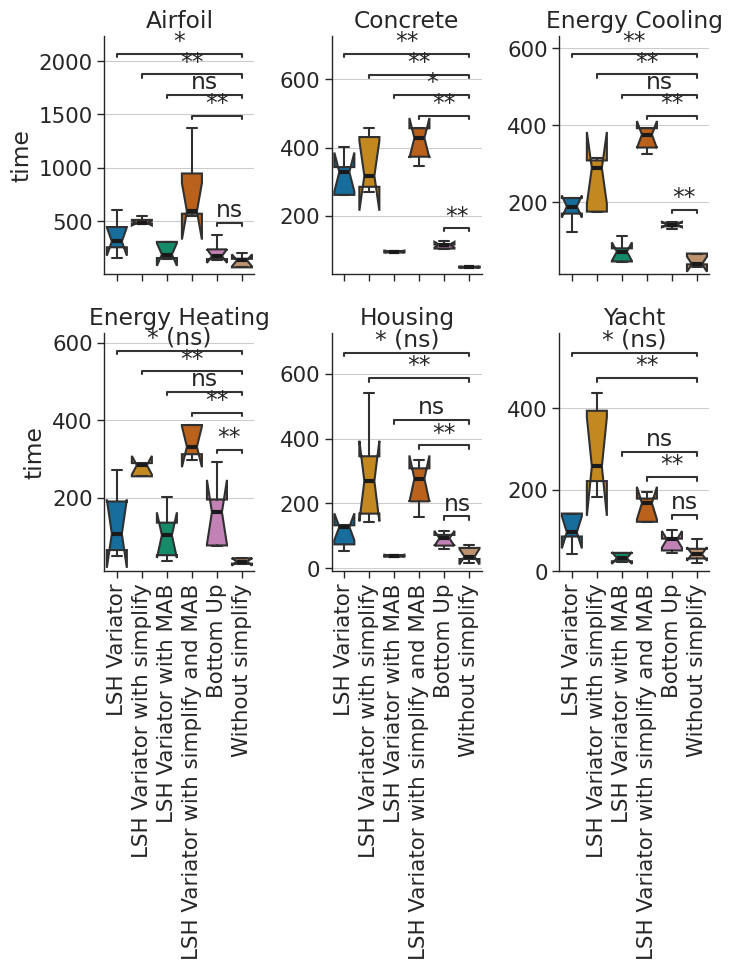

['Bottom Up' 'LSH Variator with simplify and MAB' 'LSH Variator with MAB'
 'Without simplify' 'LSH Variator with simplify' 'LSH Variator']


final critical differences diagram


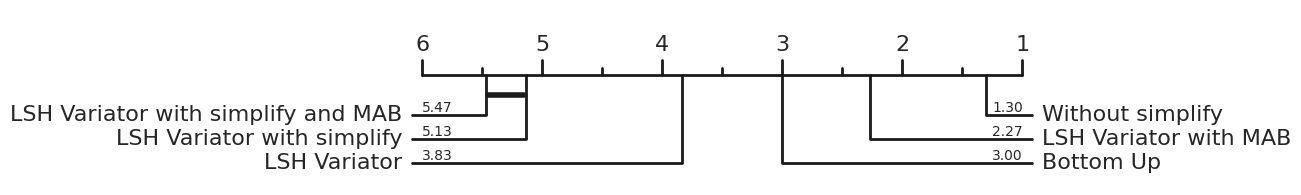

In [3]:
results_df['(only last)'] = results_df['model'].apply(lambda model: model.endswith("(only last)"))
  
for yaxis in ['size', 'test_mse', 'test_r2', 'train_mse', 'complexity', 'depth', 'time']:
    
    # Exploring boxplot results first
    g = sns.catplot(data=results_df, x='model', y=yaxis, hue='model',
        col='dataset', col_wrap=3, order=order, hue_order=order,
        **boxplot_kwargs, sharey=False, legend_out=False, aspect=0.5)

    # g.map_dataframe(sns.swarmplot, x="model", y=yaxis, 
    #                 palette=["#000000"], size=3,
    #                 alpha=0.5, dodge=True)

    g.set_titles("{col_name}").set_axis_labels("", yaxis.replace("_", " "))

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='y', linewidth=.8)
        plot_ax.set_ylabel(plot_ax.get_ylabel().replace('_', ' '))

        
        for tick in plot_ax.get_xticklabels():
            tick.set(rotation=90, ha="center")
            

        # g.ax.set_xticklabels([tl.get_text().replace(' ', '\n')for tl in g.ax.get_xticklabels()], 
        #                     rotation=90, 
        #                     ha='center',  va='top', ma='right')
        
        # All vs baseline
        pairs = [('Without simplify', l)
                    for l in results_df[results_df['dataset']==ds]['model'].unique()
                    if l != 'Without simplify']

        # pairs = list(combinations(results_df[results_df['dataset']==ds]['model'].unique(), 2))

        if True:
            try:
                annotator = Annotator(
                    plot_ax, pairs, data=results_df[(results_df['dataset']==ds)],
                    x='model', y=yaxis,
                    order=order)
                annotator.reset_configuration()
                annotator.configure(test="Mann-Whitney", # text_format='simple', # hide_non_significant=True, #
                                    comparisons_correction="holm", verbose=0) # , text_offset=-3
                
                # Calculate and annotate
                annotator.apply_and_annotate()
            except Exception as e:
                print(f"failed to add statsannotation with dataset {ds}. Except {e}")

    # Adding hatches -------------------------------------------------------------------
    # comment/uncomment block to add hatches. Make sure to unco
    # comment hue when generating the plot
    #     hatches = ['///', 'xxx']
    #     # select the correct patches
    #     patches = [patch for patch in plot_ax.patches if type(patch) == mpl.patches.PathPatch]
    #     # the number of patches should be evenly divisible by the number of hatches
    #     h = hatches * (len(patches) // len(hatches))

    #     # iterate through the patches for each subplot
    #     for patch, model in zip(patches, order):
    #         if model != 'Without simplify':
    #             patch.set_hatch(hatches[0 if not model.endswith("simplify") else 1])
            
    # colorblind_palette = sns.color_palette('colorblind')
    
    # # Fixing the legend to add the hatches
    # for lp, hatch in zip(g.legend.get_patches(), hatches):
    #     lp.set_hatch(hatch)
        #lp.set_facecolor('blue')

    #g._legend.remove()
    # ----------------------------------------------------------------------------------
    #g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.pdf")
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.png")
    plt.show()  
    
    if True:
        try:
            cd_df = results_df.copy()#.dropna() # (Just Island model sometimes gives an NAN)
            
            # Line below controls if we take the median or use each random seed as a different problem in CD
            # cd_df = cd_df.groupby(['model', 'dataset']).median().reset_index()
            
            cd_df = cd_df[cd_df.model.isin(model_nice)]
            print(cd_df.model.unique())
            cd_df['dataset_random_state'] = cd_df['dataset'] + '_' + cd_df['random_state'].astype(str)

            cd_df = cd_df[['model', 'dataset_random_state', yaxis]]

            # Ignoring random states with missing values
            frequency = cd_df['dataset_random_state'].value_counts()
            less_than = frequency[frequency < len(cd_df['model'].unique())]
            cd_df = cd_df[~cd_df['dataset_random_state'].isin(less_than.index)]
            
            display(cd_df.pivot('dataset_random_state', 'model').sample(3).style.background_gradient(cmap='viridis_r', axis=1))
            
            cd_df.columns = ['classifier_name', 'dataset_name', 'accuracy']
            # display(cd_df.sample())

            if yaxis != 'test_r2': # if smaller is better
                cd_df.accuracy = cd_df.accuracy*-1 

            # for ds in results_df['dataset'].unique():
            #     print(ds)
            #     draw_cd_diagram(cd_df[cd_df['dataset_name'].str.startswith(ds)],
            #                    alpha=0.05, path=f"../paper/figs/{yaxis}_criticaldifferences_{ds}.pdf")

            print("final critical differences diagram")
            draw_cd_diagram(cd_df, alpha=0.05, path=f"../paper/figs/{yaxis}_criticaldifferences.pdf")
        except Exception as e:
            print(f'Failed to generate the CD. error {e}')